In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install opencv-python-headless
!pip install seaborn

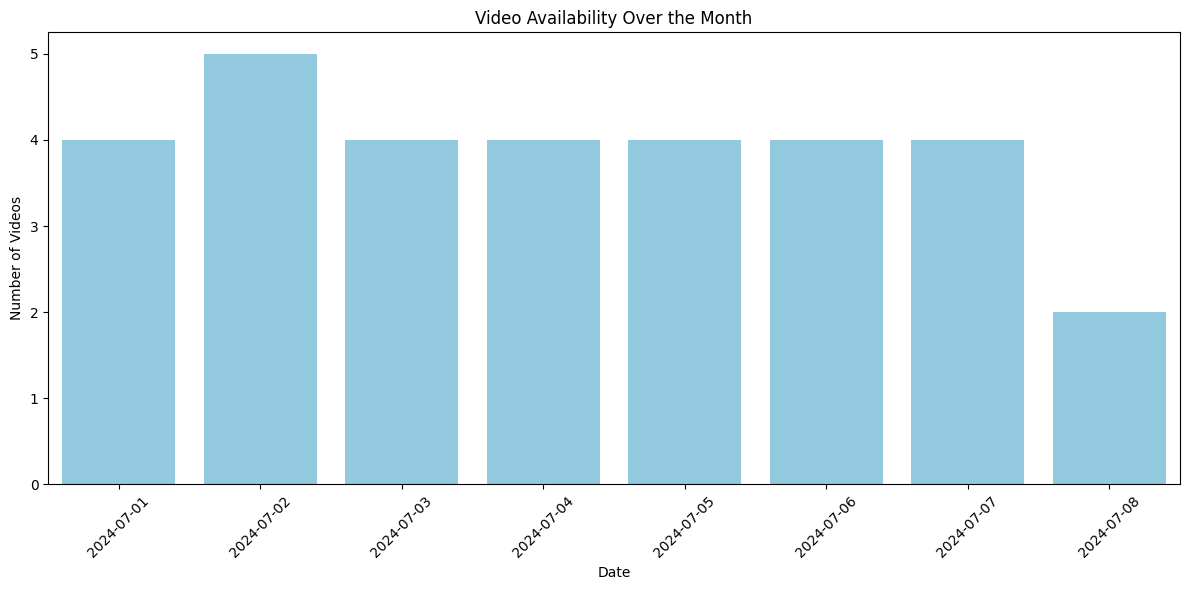

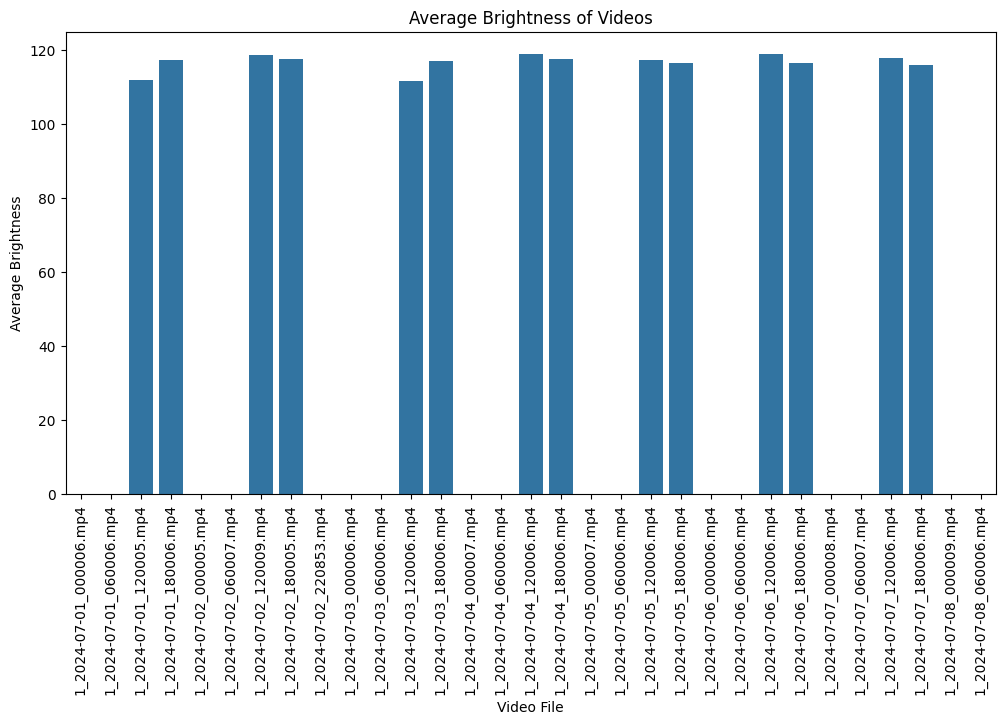

In [7]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def calculate_average_brightness(video_path):
    cap = cv2.VideoCapture(video_path)
    brightness_values = []
    success, frame = cap.read()
    while success:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        brightness = hsv[:, :, 2].mean()
        brightness_values.append(brightness)
        success, frame = cap.read()
    cap.release()
    if brightness_values:
        return np.mean(brightness_values)
    else:
        return 0

def get_video_date(video_file):
    # Extract date from filename (format: 1_YYYY-MM-DD_HHMMSS.mp4)
    try:
        date_str = video_file.split('_')[1]  # Extract YYYY-MM-DD
        date = datetime.strptime(date_str, '%Y-%m-%d')
        return date
    except ValueError:
        return None

def process_videos_in_folder(folder_path):
    brightness_data = []
    for video_file in os.listdir(folder_path):
        if video_file.endswith(('.mp4', '.avi', '.mov')):
            video_path = os.path.join(folder_path, video_file)
            average_brightness = calculate_average_brightness(video_path)
            date = get_video_date(video_file)
            if date is not None:
                brightness_data.append((video_file, date, average_brightness))
    return pd.DataFrame(brightness_data, columns=['video_file', 'date', 'average_brightness'])

def analyze_availability(df):
    # Create a DataFrame with a continuous date range
    start_date = df['date'].min()
    end_date = df['date'].max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    availability_df = pd.DataFrame(all_dates, columns=['date'])

    # Count videos per day
    video_counts = df['date'].value_counts().sort_index()
    availability_df = availability_df.set_index('date').join(video_counts.rename('video_count'))
    availability_df = availability_df.fillna(0).reset_index()

    return availability_df

def visualize_brightness(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='video_file', y='average_brightness', data=df)
    plt.xlabel('Video File')
    plt.ylabel('Average Brightness')
    plt.title('Average Brightness of Videos')
    plt.xticks(rotation=90)
    plt.show()

def visualize_availability(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='date', y='video_count', color='skyblue')
    plt.xlabel('Date')
    plt.ylabel('Number of Videos')
    plt.title('Video Availability Over the Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Folder containing videos in Google Drive
video_folder = '/content/drive/My Drive/vids'

# Process all videos in the folder
df = process_videos_in_folder(video_folder)

# Analyze and visualize availability
availability_df = analyze_availability(df)
visualize_availability(availability_df)

# Visualize average brightness of videos
visualize_brightness(df)
